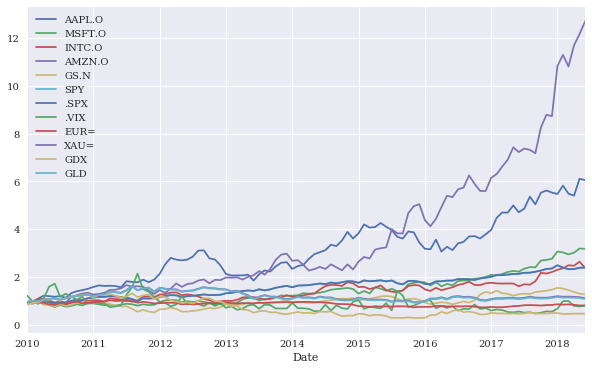

In [80]:
import numpy as np
import pandas as pd
from matplotlib import pylab
from pylab import plt, mpl  
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
eod_data = pd.read_csv('../Data/tr_eikon_eod_data.csv',index_col=0, parse_dates=True)
#eod_data = pd.DataFrame(eod_data['.SPX'])
eod_data.dropna(inplace=True)
#eod_data.info()
#eod_data['rets'] = np.log(eod_data/eod_data.shift(1))
#eod_data['vola'] = eod_data['rets'].rolling(252).std() * np.sqrt(252)
#eod_data[['.SPX', 'vola']].plot(subplots=True, figsize=(10,6))
#eod_data.plot(subplots=True, figsize=(10,6))
#eod_data.mean()
#eod_data.aggregate([min, np.mean, np.std, np.median, max]).round(2)
#eod_data.diff().mean()
#eod_data.pct_change().round(3).mean()
#eod_data.pct_change().round(3).mean().plot(kind='bar', figsize=(10,6))
rets = np.log(eod_data/eod_data.shift(1))
#rets.cumsum().apply(np.exp).plot(figsize=(10,6))
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(10,6))

In [81]:
window = 30

In [82]:
sym = 'AAPL.O'

In [83]:
eod_data = pd.DataFrame(eod_data[sym]).dropna()

In [84]:
eod_data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


In [85]:
eod_data['min'] = eod_data[sym].rolling(window=window).min()

In [86]:
eod_data['max'] = eod_data[sym].rolling(window=window).max()

In [87]:
eod_data['mean'] = eod_data[sym].rolling(window=window).mean()

In [88]:
eod_data['std'] = eod_data[sym].rolling(window=window).std()

In [89]:
eod_data['median'] = eod_data[sym].rolling(window=window).median()

In [90]:
eod_data['ewma'] = eod_data[sym].ewm(halflife=0.5, min_periods=window).mean()

In [91]:
eod_data.dropna().head()

,AAPL.O,min,max,mean,std,median,ewma
Date,,,,,,,
2010-02-16,29.057114,27.435687,30.719969,29.103804,1.054975,29.237828,28.926397
2010-02-17,28.935685,27.435687,30.719969,29.049233,1.018063,29.033900,28.933363
2010-02-18,28.989685,27.435687,30.719969,28.994700,0.973551,29.000185,28.975605
2010-02-19,28.809971,27.435687,30.719969,28.950414,0.949649,28.962685,28.851380
2010-02-22,28.630829,27.435687,30.719969,28.902014,0.926667,28.872828,28.685966


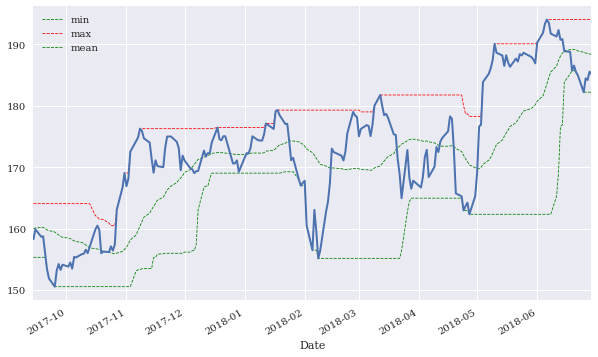

In [92]:
ax = eod_data[['min', 'max', 'mean']].iloc[-200:].plot(figsize=(10,6), style=['g--', 'r--', 'g--'], lw=0.8)
eod_data[sym].iloc[-200:].plot(ax=ax, lw=2.0)

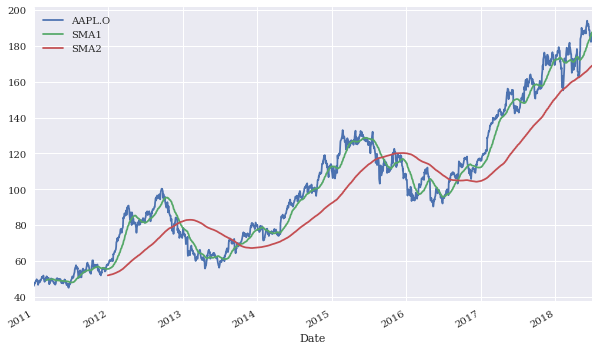

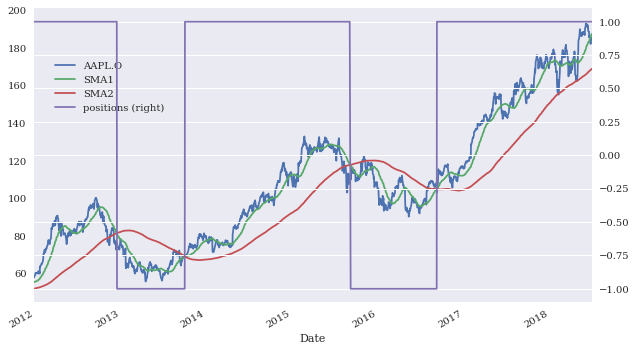

In [94]:
eod_data['SMA1'] = eod_data[sym].rolling(window=42).mean()
eod_data['SMA2'] = eod_data[sym].rolling(window=252).mean()
eod_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10,6))
eod_data.dropna(inplace=True)
eod_data['positions'] = np.where(eod_data['SMA1'] > eod_data['SMA2'], 1, -1)
ax = eod_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));